In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Electric_Vehicle_Population_Data.csv")

# **Let's do the Inspection of the data  as in Exploratory Data Analysis we first Inspect the data.**
## 1.So First lets get some information about the dataset by using info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   VIN (1-10)                                         1017 non-null   object
 1   County                                             1017 non-null   object
 2   City                                               1017 non-null   object
 3   State                                              1017 non-null   object
 4   Postal Code                                        1017 non-null   int64 
 5   Model Year                                         1017 non-null   int64 
 6   Make                                               1017 non-null   object
 7   Model                                              1017 non-null   object
 8   Electric Vehicle Type                              1017 non-null   object
 9   Clean Alternative F

## 2.Let's see the first 5 rows  from starting and 5 rows from end for better understanding by using head() and tail() 

In [5]:
df.head()
df.tail()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1012,7SAYGDEE0P,King,Seattle,WA,98122,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43,259912327,POINT (-122.31009 47.60803),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007502
1013,KNDC3DLC4N,King,Seattle,WA,98133,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,32,204702893,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000404
1014,WA1F2BFY5P,King,Seattle,WA,98146,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,34,244836245,POINT (-122.36178 47.49408),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033012100
1015,1C4RJYE68N,King,Seattle,WA,98115,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,46,228075018,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033002000
1016,WBA33AG03N,King,Seattle,WA,98109,2022,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,36,254074397,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006701


## 3.For getting the statistical information we will be using .describe()

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1.017000e+03,1.017000e+03
mean,98236.195674,2020.781711,69.365782,1081.710914,30.548673,2.319944e+08,5.303936e+10
std,284.230509,3.188862,96.417736,7889.976686,15.158865,8.042506e+07,1.630303e+07
min,98002.000000,2011.000000,0.000000,0.000000,1.000000,1.860498e+06,5.300796e+10
25%,98033.000000,2018.000000,0.000000,0.000000,18.000000,1.904155e+08,5.303301e+10
50%,98117.000000,2022.000000,18.000000,0.000000,35.000000,2.449228e+08,5.303303e+10
75%,98359.000000,2023.000000,114.000000,0.000000,45.000000,2.690951e+08,5.303509e+10
max,99362.000000,2025.000000,322.000000,69900.000000,49.000000,4.787921e+08,5.307794e+10


# Starting with the data Preprocesssing 
## 4.Let's see if there is any missing value present or not .If there is there we will handel it.

In [7]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

## Let's remove the duplicate now and make some changes in the Electric Vehicle Type Column

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Model Year'] = df['Model Year'].astype(int)

def simplify_ev_type(ev_type):
    if ev_type == 'Battery Electric Vehicle (BEV)':
        return 'BEV'
    elif ev_type == 'Plug-in Hybrid Electric Vehicle (PHEV)':
        return 'PHEV'
    else:
        return ev_type  

df['Electric Vehicle Type'] = df['Electric Vehicle Type'].apply(simplify_ev_type)

##  #Starting  with the Data Visualization.


## **Analzying  the correlation between numerical variables in the dataset**

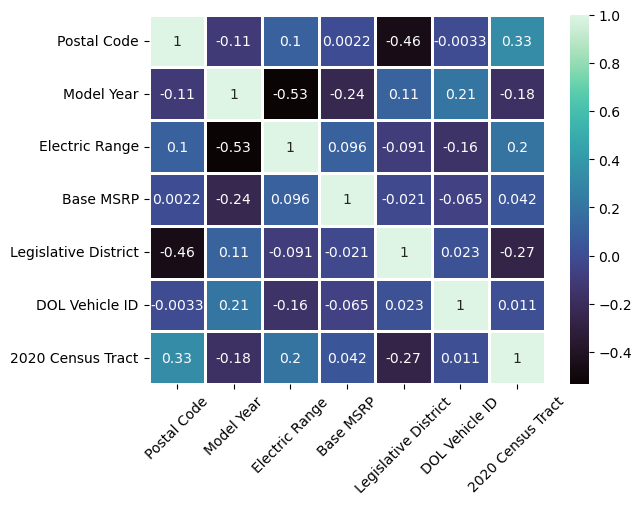

In [10]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='mako',linewidth=1)
plt.xticks(rotation=45)
plt.show()

#### Here we can see that Most variables show weak or no correlation.Model Year and Electric Range have a moderate negative correlation (-0.53).Postal Code and 2020 Census Tract show a moderate positive correlation (0.33).Legislative District and Postal Code are negatively correlated (-0.46).

## **Objective1. To compare the production of Plug-in Hybrid Electric Vehicles (PHEVs) and Battery Electric Vehicles (BEVs).**

Text(0.5, 1.0, 'No of electric vehicle produced by PHEV and BEV')

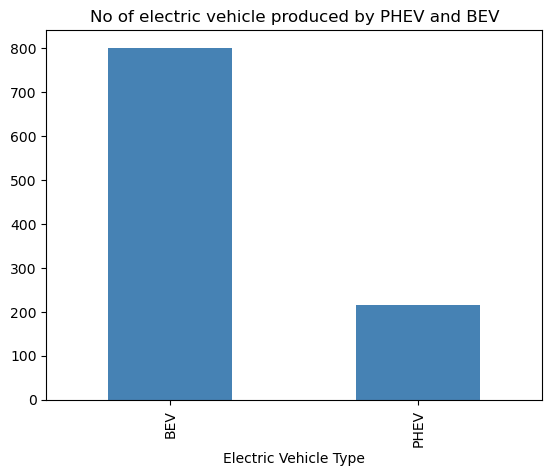

In [11]:
df['Electric Vehicle Type'].value_counts().plot(kind='bar', color='steelblue')
plt.title("No of electric vehicle produced by PHEV and BEV")

### The chart shows that BEVs are produced in much higher numbers (around 800) compared to PHEVs (around 220). This indicates a stronger market or manufacturing focus on fully electric vehicles.

## **Objective2. To analyze the geographic distribution of electric vehicles across cities.**

Text(0.5, 1.0, 'Top 10 cities with most Evs')

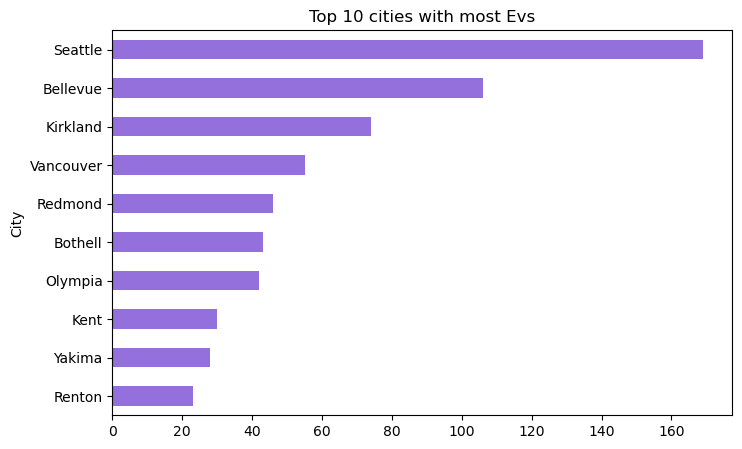

In [12]:
plt.figure(figsize=(8, 5))
df['City'].value_counts().head(10)[::-1].plot(kind='barh', color='mediumpurple')
plt.title("Top 10 cities with most Evs")

### We can see that Seattle is the city which used EVs the most.

## **Objective3. To illustrate the distribution of electric vehicle types.**


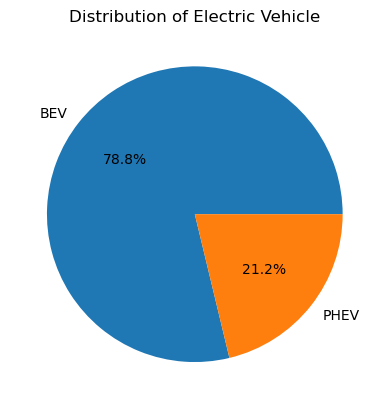

In [13]:
s=df['Electric Vehicle Type'].value_counts()
s.name=None
s.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Electric Vehicle")
plt.show()

### From here we can see that Battery Electric Vehicle covers 78.8% of the market and PHEV covers only 21.2 % of the market

## **Objective4. To examine trends in electric vehicle adoption over time.**

Text(0, 0.5, 'Number of EVs')

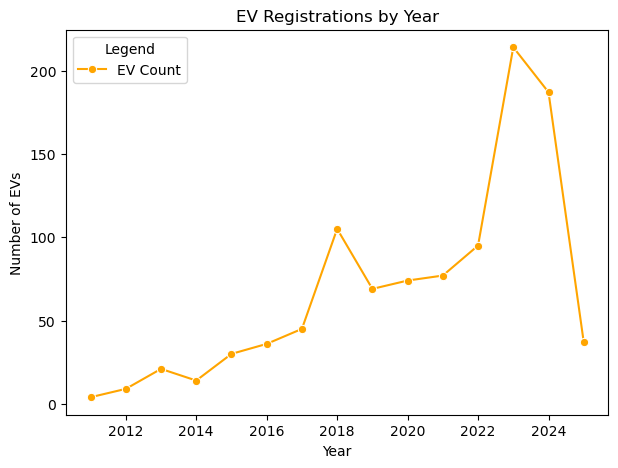

In [14]:
# Group by Model Year and count
model_year_counts = df.groupby('Model Year').size().reset_index(name='Count')
plt.figure(figsize=(7, 5))
sns.lineplot(data=model_year_counts, x='Model Year', y='Count', marker='o', color='orange',label='EV Count')
plt.title('EV Registrations by Year')
plt.legend(title='Legend')
plt.xlabel('Year')
plt.ylabel('Number of EVs')

### The above chart shows that EV registrations have generally increased over time, with sharp growth after 2022. However, there is a notable drop in 2025

## **Objective5. To examine the frequency distribution of EV electric range (in miles).**

Text(0, 0.5, 'Frequency')

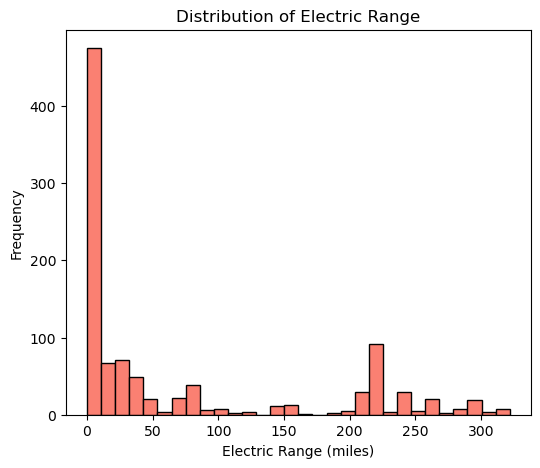

In [15]:
plt.figure(figsize=(6,5))
plt.hist(df['Electric Range'].dropna(),bins=30,color='salmon',edgecolor='black')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')




### From the above we can see that most vehicles have low range (0–50 miles).Very few vehicles have high range (200+ miles)

## **Objective6. Analyzing EV Growth Trend by Model Year and Vehicle Type.**

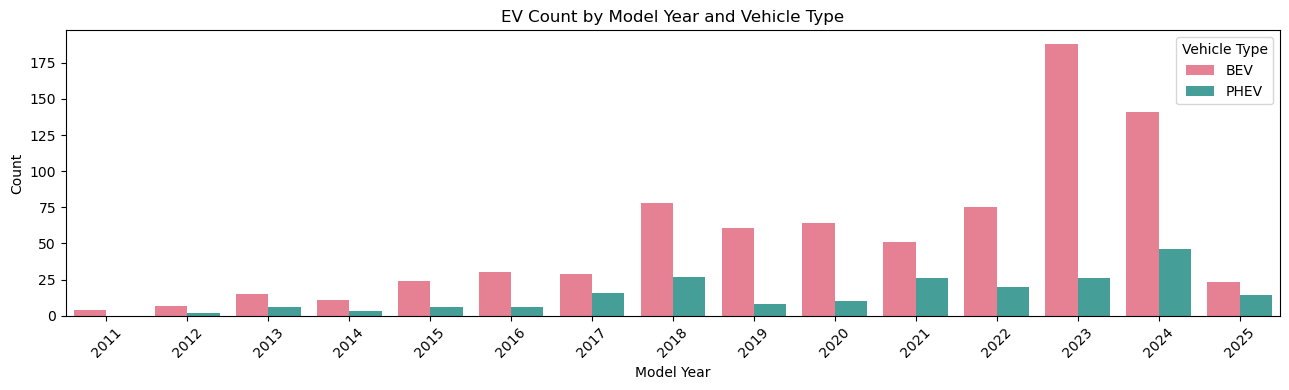

In [18]:
plt.figure(figsize=(13, 4))
sns.countplot(data=df, x='Model Year', hue='Electric Vehicle Type', palette='husl')
plt.xticks(rotation=45)
plt.title("EV Count by Model Year and Vehicle Type")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

### The graph reveals a clear upward trend in electric vehicle (EV) adoption, particularly in recent years, indicating a rapidly expanding market.  Notably, Battery Electric Vehicles (BEVs) are gaining significant traction, surpassing Plug-in Hybrid Electric Vehicles (PHEVs) in popularity.